In [1]:
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
from probeinterface import Probe
from probeinterface.plotting import plot_probe
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

15:18:55 [I] klustakwik KlustaKwik2 version 0.2.6


Channel ids: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31']
Sampling frequency: 30000.0
Number of channels: 32
Number of segments: 1


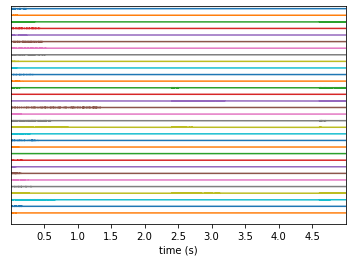

In [2]:
recording_folder = '3782_week5_REF_161021.rhd'
recording = se.IntanRecordingExtractor(recording_folder)

channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_segments = recording.get_num_segments()

print(f'Channel ids: {channel_ids}')
print(f'Sampling frequency: {fs}')
print(f'Number of channels: {num_chan}')
print(f"Number of segments: {num_segments}")

w_ts = sw.plot_timeseries(recording, time_range = [0,5])

In [3]:
n = 32
positions = np.zeros((n, 2))

positions[0]=0,0

positions[1]=0,80
positions[2]=-20,100
positions[3]=+20,100
positions[4]=0,120

positions[5]=0,200
positions[6]=0,280

positions[7]=0,360
positions[8]=-20,380
positions[9]=+20,380
positions[10]=0,400

positions[11]=0,480
positions[12]=0,560
positions[13]=0,640

positions[14]=0,720
positions[15]=-20,740
positions[16]=+20,740
positions[17]=0,760

positions[18]=0,840
positions[19]=0,920
positions[20]=0,1000
positions[21]=0,1080

positions[22]=0,1160
positions[23]=-20,1180
positions[24]=+20,1180
positions[25]=0,1200

positions[26]=0,1280
positions[27]=0,1360
positions[28]=0,1440
positions[29]=0,1520
positions[30]=0,1600
positions[31]=0,1680



In [4]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 7.5})

polygon = [(-85, -50), (0, -200), (+85, -50), (+85, 1800), (-85, 1800)]
probe.set_planar_contour(polygon)

channel_indices = np.array([8,6,26,10,22,23,4,7,24,11,20,27,3,13,25,21,9,
                            5,19,1,29,14,28,18,12,2,30,17,31,16,0,15])
probe.set_device_channel_indices(channel_indices)


(<matplotlib.collections.PolyCollection at 0x1d656a2c910>,
 <matplotlib.collections.PolyCollection at 0x1d64634c5b0>)

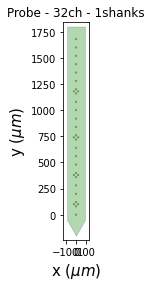

In [5]:
plot_probe(probe)

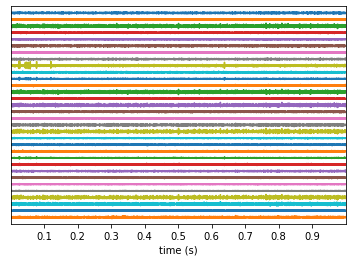

In [6]:
recording_prb = recording.set_probe(probe)
recording_cmr = st.common_reference(recording_prb, reference='global', operator='median')
w = sw.plot_timeseries(recording_cmr)

In [7]:
ss.IronClustSorter.set_ironclust_path('./ironclust')
ss.IronClustSorter.ironclust_path
!echo $IRONCLUST_PATH

Setting IRONCLUST_PATH environment variable for subprocess calls to: c:\Users\emili\Documentos\PythonProjects\SpikeInterfaceTest\ironclust
$IRONCLUST_PATH


In [8]:
ss.installed_sorters()

['ironclust', 'klusta']

In [9]:
sorting_KL = ss.run_sorter('ironclust', recording_cmr, 
                            output_folder='results_KL_newProbe',
                            verbose=True)
print(f'IronClust found {len(sorting_KL.get_unit_ids())} units')

Warning! The recording is already filtered, but ironclust filter is enabled
write_binary_recording with n_jobs 1  chunk_size 7812500
channels = 32, timepoints = 5686016, duration = 3.1588977777777774 minutes
Creating argfile.txt...
Running ironclust in c:\Users\emili\Documentos\PythonProjects\SpikeInterfaceTest\results_KL_newProbe\tmp...
RUNNING SHELL SCRIPT: results_KL_newProbe\run_ironclust.bat
Error running ironclust
Traceback (most recent call last):
  File "c:\Users\emili\Documentos\PythonProjects\SpikeInterfaceTest\spike\lib\site-packages\spikeinterface\sorters\basesorter.py", line 200, in run_from_folder
    SorterClass._run_from_folder(output_folder, sorter_params, verbose)
  File "c:\Users\emili\Documentos\PythonProjects\SpikeInterfaceTest\spike\lib\site-packages\spikeinterface\sorters\ironclust\ironclust.py", line 230, in _run_from_folder
    shell_script.start()
  File "c:\Users\emili\Documentos\PythonProjects\SpikeInterfaceTest\spike\lib\site-packages\spikeinterface\sorters

SpikeSortingError: Spike sorting failed. You can inspect the runtime trace in results_KL_newProbe/spikeinterface_log.json